In [8]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
ticker = '688002'

In [10]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
income.rename(columns={'归属于母公司所有者的净利润': '净利润'}, inplace=True)
incomeq.rename(columns={'归属于母公司所有者的净利润': '净利润'}, inplace=True)

In [11]:
change = income[['营业总收入', '营业总成本', '净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change

,截止日期,净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,净利润
94887,2019-12-31,2.020659e+08,0.4928,0.4928,78.2,90.2,61.4
94888,2018-12-31,1.251681e+08,0.3725,0.3725,146.7,130.1,94.5
94895,2017-12-31,6.435090e+07,0.2326,0.2326,158.5,82.6,563.9
94901,2016-12-31,9.693300e+06,0.0379,0.0379,NaN,NaN,NaN


In [12]:
change = incomeq[['营业收入', '净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '净利润']], change], axis=1)
incomeq_change[:24]

,截止日期,营业收入,净利润,营业收入,净利润
152629,2020-06-30,4.624410e+08,2.233495e+08,201.2,438.8
152630,2020-03-31,2.307441e+08,8.503072e+07,129.5,265.9
152631,2019-12-31,2.824137e+08,1.009028e+08,33.5,20.7
152632,2019-09-30,1.481985e+08,3.647312e+07,162.6,242.1
152633,2019-06-30,1.535190e+08,4.144934e+07,92.5,44.9
152634,2019-03-31,1.005251e+08,2.324061e+07,177.1,605.8
152635,2018-12-31,2.116213e+08,8.360729e+07,NaN,NaN
152636,2018-09-30,5.644082e+07,1.066225e+07,NaN,NaN
152637,2018-06-30,7.975938e+07,2.861038e+07,NaN,NaN
152638,2018-03-31,3.628320e+07,3.292797e+06,NaN,NaN


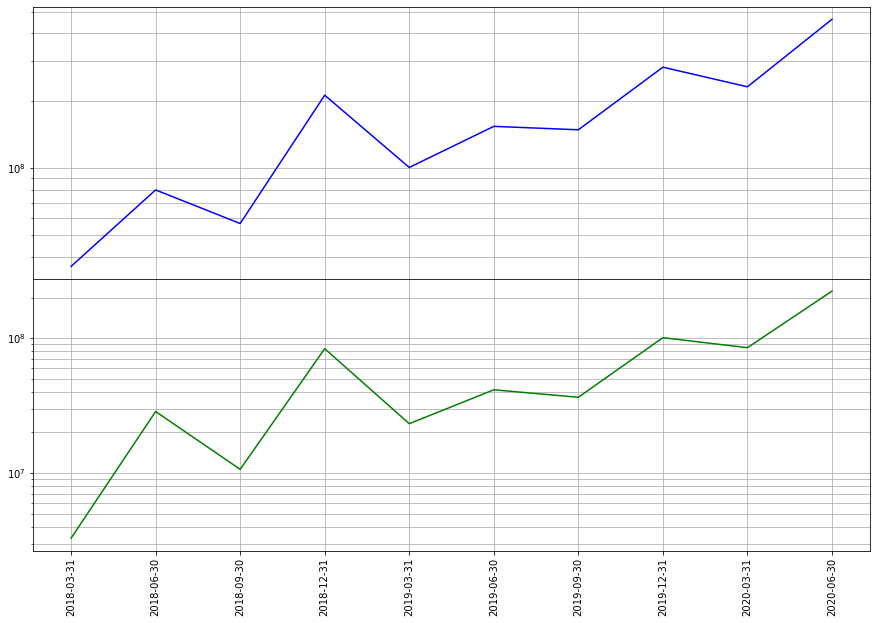

In [13]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [14]:
df = data.get_market(ticker)
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价          累积前复权因子              滚动市盈率  \
            min        max    min    max       min       max      min   
交易日期                                                                    
2019 2019-07-22 2019-12-31  30.93  72.15  0.998997  0.998997  74.4917   
2020 2020-01-02 2020-10-19  37.95  97.63  0.998997  1.000000  61.3957   

                
           max  
交易日期            
2019  203.2653  
2020  134.8701